In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1

**1.1**

a)

$$
f_ξ(x)=\begin{cases}θ^2xe^{−θx},& x\geq0,\\0,& else\end{cases}
$$

$$
\theta \in \{0.5, 2, 8\}
$$

$$
E(\xi) = θ^2\int_0^{\infty}{x^2e^{−θx}}\,dx = -θ\int_0^{\infty}{x^2(e^{−θx})'}\,dx = -\theta x^2 e^{−θx}|_0^∞(=0) - 2\int_0^{\infty}{x(e^{−θx})'}\,dx =
$$

$$
=-2x e^{−θx}|_0^∞(=0) + 2\int_0^{\infty}{e^{−θx}}\,dx = \frac{2e^{−θx}}{\theta}|_0^{\infty}=\frac{2}{\theta}
$$

$$
D(\xi) = \int_0^\infty{(x-\frac{2}{\theta})^2}θ^2xe^{−θx} \,dx=\int_0^\infty{(x^2-\frac{4x}{\theta}+\frac{4}{\theta^2})}θ^2xe^{−θx} \,dx = \frac{6}{\theta^2}-\frac{8}{\theta^2}+\frac{4}{\theta^2} = \frac{2}{\theta^2}
$$

$$
f_{\xi^2}=\frac{1}{2\sqrt{x}}(f_\xi(\sqrt{x}) + f_\xi(-\sqrt{x})) = \frac{1}{2}\theta^2(e^{-\theta\sqrt{x}} + 0)
$$

$$
E(\xi^2) = \frac{θ^2}{2}\int_0^{\infty}{xe^{−θ\sqrt{x}}}\,dx =//\sqrt{x}=t, dx = 2\sqrt{x}dt//={θ^2}\int_0^{\infty}{t^3e^{−θt}}\,dx= \frac{6}{\theta^2}
$$

$$
E(\xi(0.5)) = 4\,, E(\xi(2)) = 1\,, E(\xi(8)) = \frac{1}{4}
$$

$$
D(\xi(0.5)) = 8\,, D(\xi(2)) = 0.5\,, D(\xi(8)) = \frac{1}{32}=0.03125
$$

$$
E(\xi^2(0.5)) = 24\,, E(\xi^2(2)) = 1.5\,, E(\xi^2(8)) = \frac{3}{32}=0.09375
$$

b)



In [ ]:
# Функция для генерации выборки
def generate_sample(a, theta, k):
    return np.random.gamma(a, 1/theta, k)

def generate_and_plot_gamma_distr_estimation(a, theta):
    # Оценки
    k_values = []
    k = 2
    for i in range(4, 25):
        k *= 2
        k_values.append(k)
    # print(k_values)
    mean_estimates = []
    variance_estimates = []
    mean_square_estimates = []

    for k in k_values:
        sample = generate_sample(a, theta, k)
        mean_estimates.append(np.mean(sample))
        variance_estimates.append(np.var(sample, ddof=1))  # несмещенная оценка
        mean_square_estimates.append(np.mean(sample**2))

    # Аналитические значения
    analytical_mean = a / theta
    analytical_variance = a / theta**2
    analytical_mean_square = a*3/theta**2

    # Визуализация
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle('gamma with a=' + str(a) + ', theta=' + str(theta), fontsize=20)

    # График математического ожидания
    plt.subplot(1, 3, 1)
    plt.plot(k_values, mean_estimates, label='Оценка M(ξ)', marker='o')
    plt.axhline(y=analytical_mean, color='r', linestyle='--', label='Аналитическое M(ξ)')
    # plt.xscale('log')
    plt.xlabel('k')
    plt.ylabel('Оценка')
    plt.title('Математическое ожидание')
    plt.legend()

    # График дисперсии
    plt.subplot(1, 3, 2)
    plt.plot(k_values, variance_estimates, label='Оценка D(ξ)', marker='o')
    plt.axhline(y=analytical_variance, color='r', linestyle='--', label='Аналитическое D(ξ)')
    # plt.xscale('log')
    plt.xlabel('k')
    plt.ylabel('Оценка')
    plt.title('Дисперсия')
    plt.legend()

    # График математического ожидания квадрата
    plt.subplot(1, 3, 3)
    plt.plot(k_values, mean_square_estimates, label='Оценка M(ξ^2)', marker='o')
    plt.axhline(y=analytical_mean_square, color='r', linestyle='--', label='Аналитическое (M(ξ))^2')
    # plt.xscale('log')
    plt.xlabel('k')
    plt.ylabel('Оценка')
    plt.title('Математическое ожидание квадрата')
    plt.legend()

    plt.tight_layout()
    plt.show()

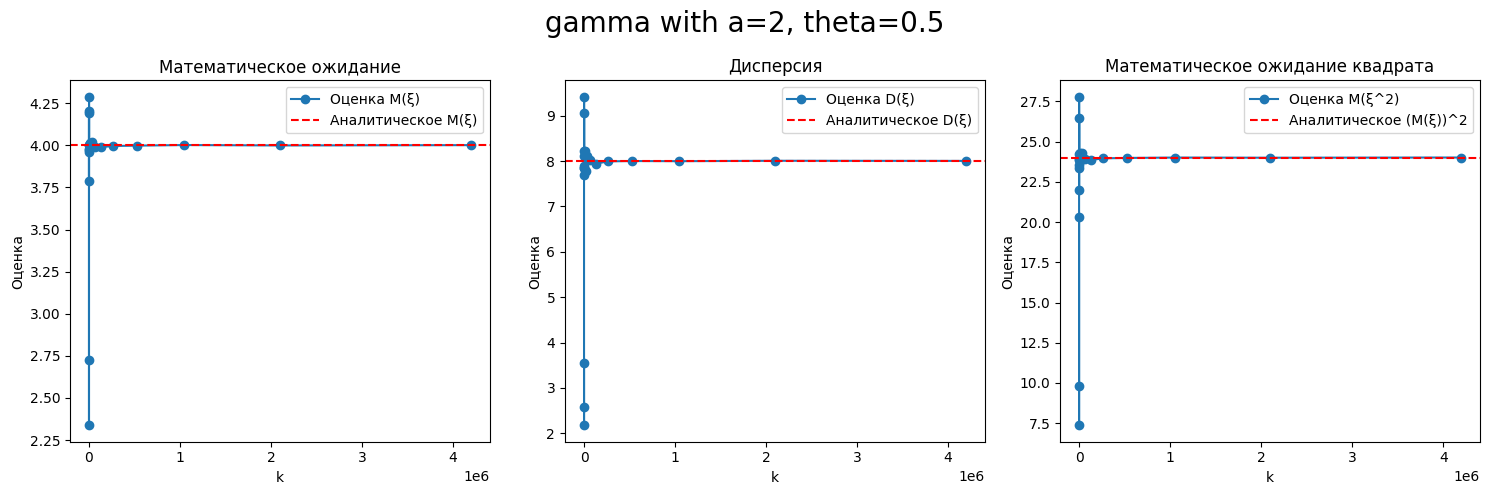

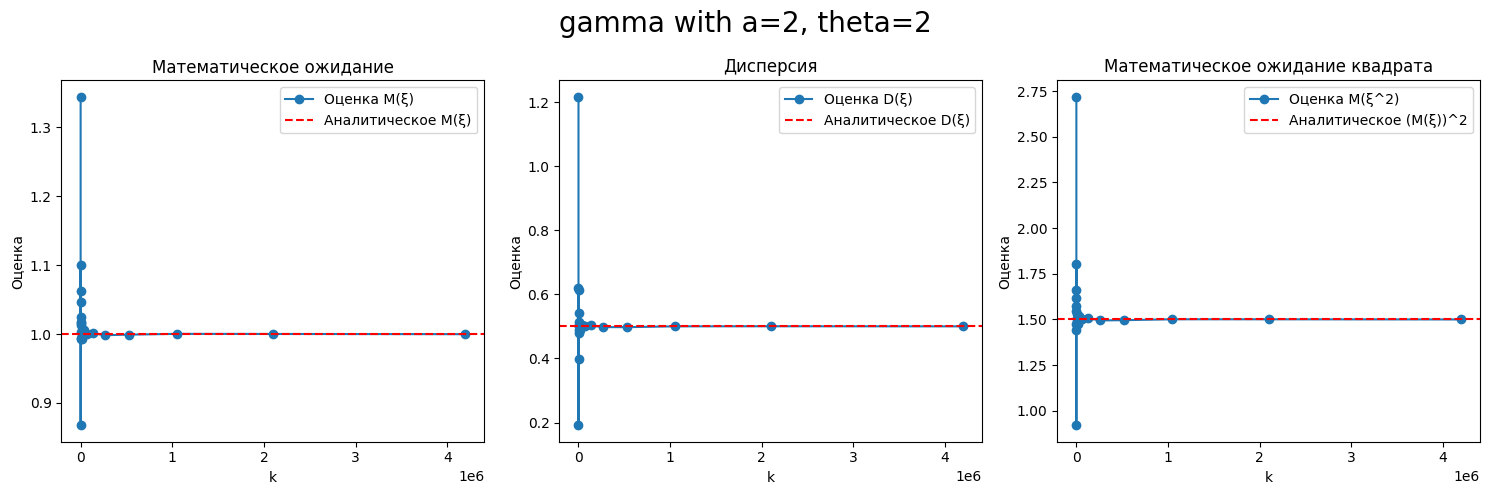

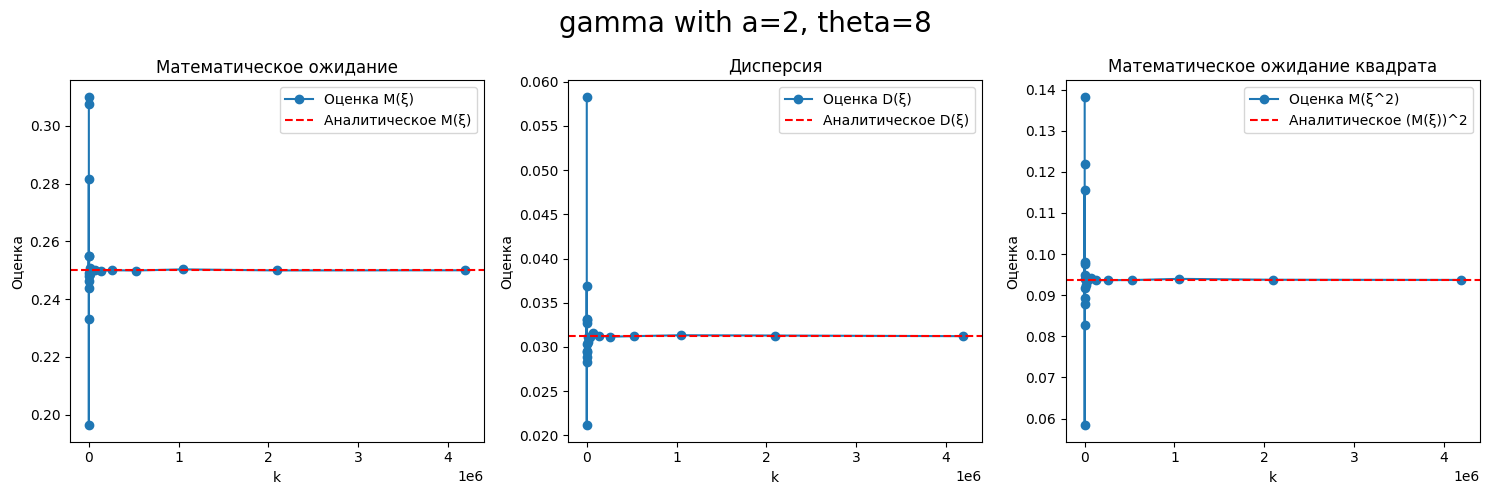

In [ ]:
generate_and_plot_gamma_distr_estimation(a=2, theta=0.5)
generate_and_plot_gamma_distr_estimation(a=2, theta=2)
generate_and_plot_gamma_distr_estimation(a=2, theta=8)

2.

$$
f_ξ^{λ, a}(x)=\begin{cases} \lambda e^{-λ(x-a)},& x \geq a,\\0,& else\end{cases}
$$

Данное распределение является экспоненциальным, смещенным на a.

$$
E(f_ξ^{λ, a}) = \int_a^\infty x \lambda e^{-λ(x-a)} \, dx = -xe^{-\lambda (x-a)}|_a^\infty + \int_a^\infty e^{-λ(x-a)} \, dx = a + \frac{1}{\lambda}\,
$$

$$
E(f_ξ^{2, 2})=2.5
$$

В силу того, что функция убывающая:
$$
Mo = argmax_{a\le x \le \infty} \, f_ξ^{λ, a}(x)=a
$$

$$
Mo_{f_ξ^{2, 2}} = 2
$$

Медиана:
$$
F(x) = \int_a^x \lambda e^{-λ(t-a)} \, dt = -e^{-\lambda(t-a)}|_a^x= -e^{-\lambda(x-a)} + 1
$$

$$
F(x) = 1 - e^{-\lambda(x-a)} = \frac{1}{2}
$$

$$
median = \frac{ln({2})}{\lambda} + a
$$

$$
median_{f_ξ^{2, 2}}=\frac{ln({2})}{2} + 2 = 2.347
$$


Моделирование:

In [ ]:
# Параметры
lambda_param = 2.0
a = 2.0

# Функция для генерации выборки
def generate_sample(size):
    return np.random.exponential(1/lambda_param, size) + a

# Оценка моды, математического ожидания и медианы
def calculate_estimates(sample):
    mode_estimate = a  # Мода для экспоненциального распределения
    mean_estimate = np.mean(sample)
    median_estimate = np.median(sample)
    return mode_estimate, mean_estimate, median_estimate

# Аналитические значения
analytical_mean = a + 1/lambda_param
analytical_median = a + np.log(2)/lambda_param

In [ ]:
# Визуализация для  выборки
def plt_hist_data(n_samples, name, bins):
    sample = generate_sample(n_samples)
    mode, mean, median = calculate_estimates(sample)
    plt.figure(figsize=(14, 6))

    # Гистограмма  выборки
    plt.subplot(1, 2, 1)
    sns.histplot(sample, bins=bins, kde=False, stat='density', color='lightblue', label='Гистограмма')
    plt.axvline(mode, color='red', linestyle='--', label='Мода (оценка)')
    plt.axvline(mean, color='green', linestyle='--', label='Математическое ожидание (оценка)')
    plt.axvline(median, color='orange', linestyle='--', label='Медиана (оценка)')
    plt.axvline(a, color='red', linestyle='-', label='Мода (аналитическая)')
    plt.axvline(analytical_mean, color='green', linestyle='-', label='Математическое ожидание (аналитическая)')
    plt.axvline(analytical_median, color='orange', linestyle='-', label='Медиана (аналитическая)')
    plt.title('Гистограмма ' + str(name) + ' выборки')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend()

    # Функция распределения плотности для большой выборки
    plt.subplot(1, 2, 2)
    sns.kdeplot(sample, bw_adjust=0.5, fill=True)
    plt.axvline(a, color='red', linestyle='-', label='Мода (аналитическая)')
    plt.axvline(analytical_mean, color='green', linestyle='-', label='Математическое ожидание (аналитическая)')
    plt.axvline(analytical_median, color='orange', linestyle='-', label='Медиана (аналитическая)')
    plt.title('Функция распределения плотности ' + str(name) + ' выборки')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend()

    plt.tight_layout()
    plt.show()

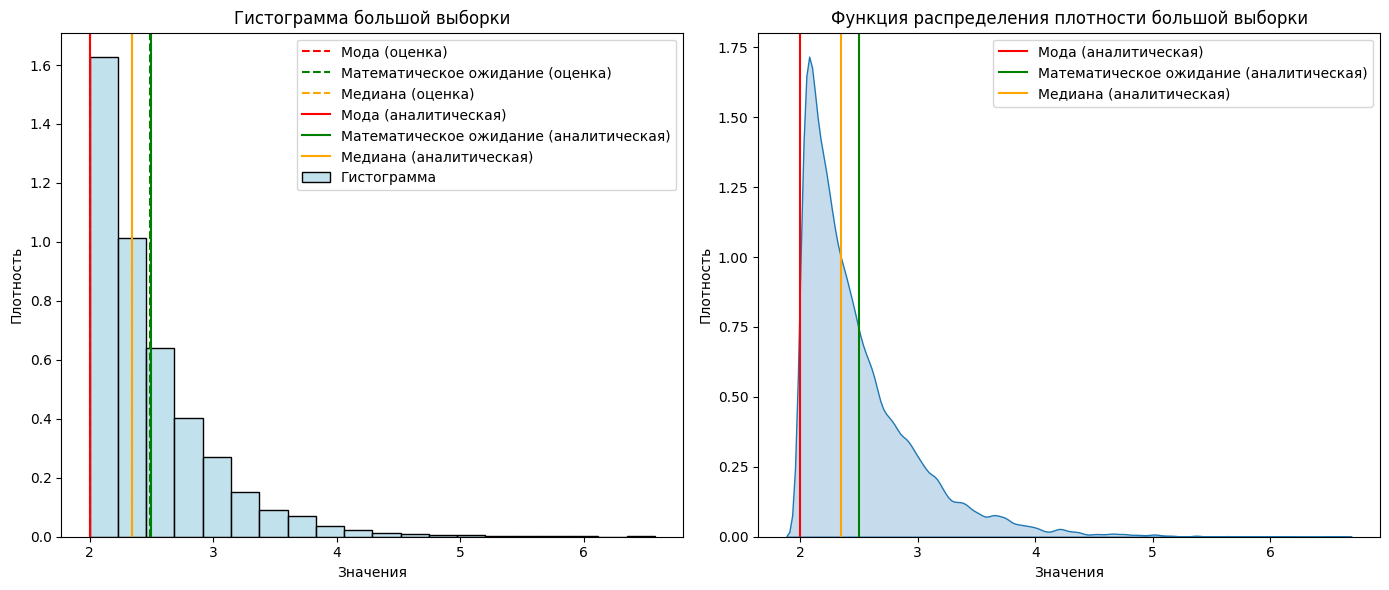

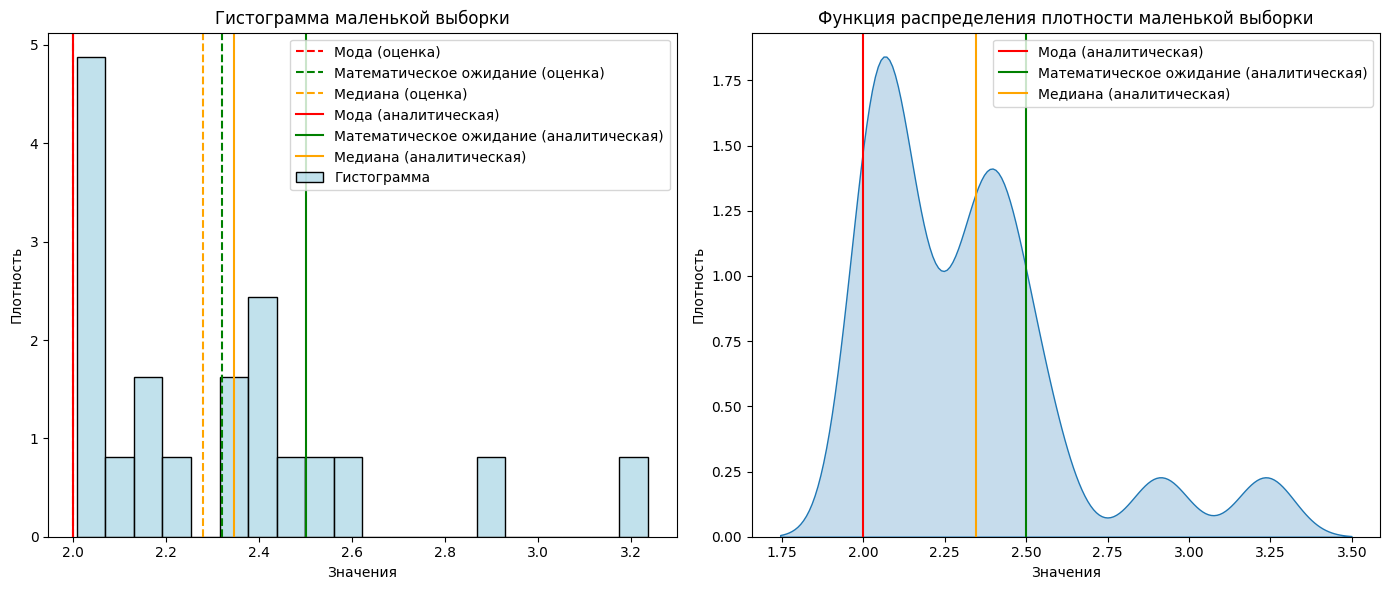

In [ ]:
plt_hist_data(10000, "большой", 30)
plt_hist_data(20, "маленькой", 20)

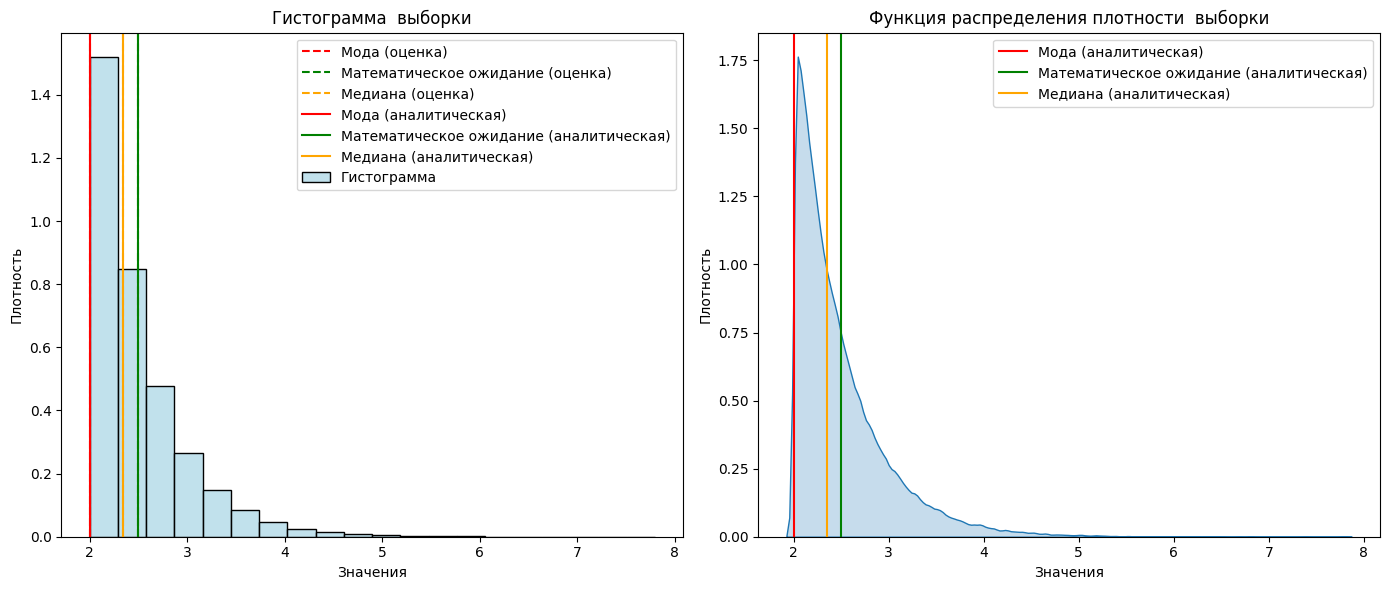

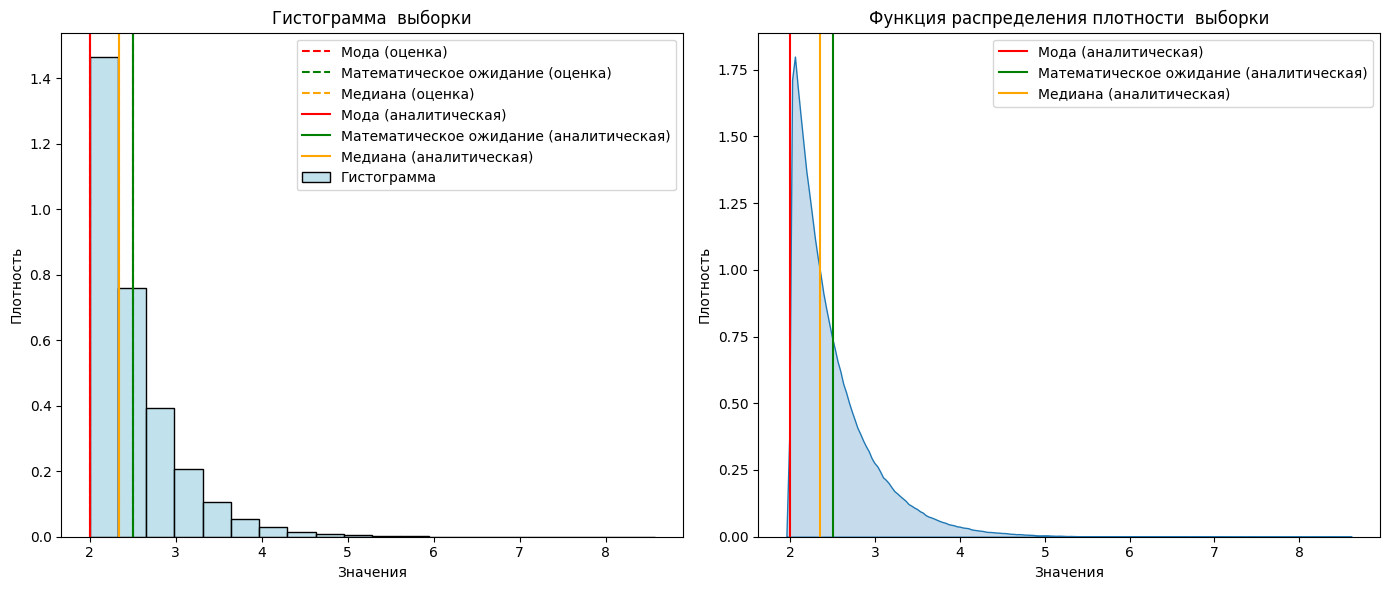

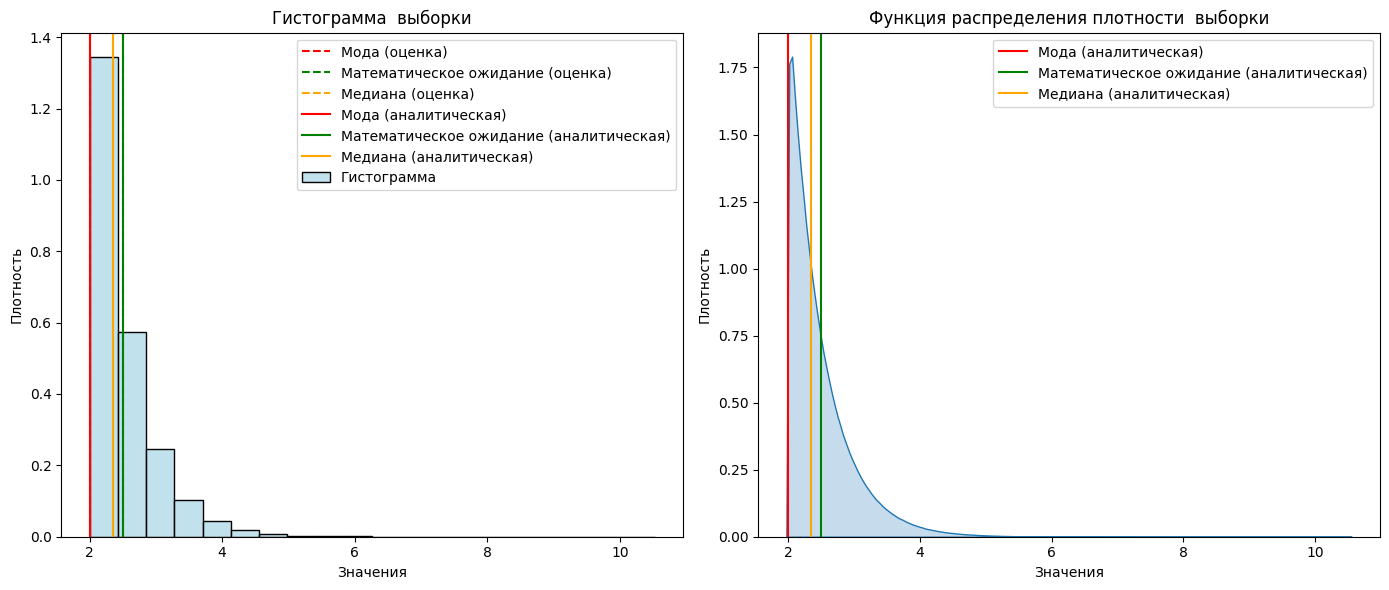

In [ ]:
n_samples = 100000
plt_hist_data(n_samples=n_samples, name="", bins = 20)
plt_hist_data(n_samples=n_samples*10, name="", bins = 20)
plt_hist_data(n_samples=n_samples*100, name="", bins = 20)

**3.**

|$\xi$ \ $\eta$|1|2|3|...|k|...|margin $\xi$
|-|-|-|-|-|-|-|-
|-1|$\frac{2}{5} \frac{1}{2^1}$|$\frac{2}{5} \frac{1}{2^2}$|$\frac{2}{5} \frac{1}{2^3}$|...|$\frac{2}{5} \frac{1}{2^k}$|...|$\frac{2}{5}$
| 0|$\frac{1}{5} \frac{1}{2^1}$|$\frac{1}{5} \frac{1}{2^2}$|$\frac{1}{5} \frac{1}{2^3}$|...|$\frac{1}{5} \frac{1}{2^k}$|...|$\frac{1}{5}$
| 1|$\frac{2}{5} \frac{1}{2^1}$|$\frac{2}{5} \frac{1}{2^2}$|$\frac{2}{5} \frac{1}{2^3}$|...|$\frac{2}{5} \frac{1}{2^k}$|...|$\frac{2}{5}$
|margin $\eta$|$\frac{1}{2^1}$|$\frac{1}{2^2}$|$\frac{1}{2^3}$|...|$\frac{1}{2^k}$|...


$E(\xi) = -2/5 + 2/5 = 0$

$E(\eta) = \sum_{k=1}^\infty \frac{k}{2^k} = 2$

$E(\xi\eta) =\sum_{k=1}^\infty \frac{2}{5}(\frac{k}{2^k}-\frac{k}{2^k}) + 0 = 0$

$E(\xi^2) = \frac{4}{5}$

$E(\eta^2) = \sum_{k=1}^\infty \frac{k^2}{2^k} = 6$

$cov(\xi,\eta) = E(\xi\eta) - E(\xi)E(\eta) = 0$

$cov(\xi,\xi) = E(\xi^2) - E(\xi)^2 = 4/5$

$cov(\eta,\eta) = E(\eta^2) - E(\eta)^2 = 6-4=2$   

Ковариационная матрица:

|cov|$\xi$     | $\eta$ |
| -------- | -------|-
|**$\xi$**| 0.8      | 0    
|**$\eta$**| 0      | 2


$cor(\xi,\eta) = \frac{cov(\xi,\eta)}{\sqrt{D(\xi)}\sqrt{D(\eta)}} = \frac{0}{\sqrt{4/5}\sqrt{2}} = 0$



Корреляционная матрица:

|cor|$\xi$     | $\eta$ |
| -------- | -------|-
|**$\xi$**| 1      | 0  
|**$\eta$**| 0 | 1


In [ ]:
Е# Определение вероятностей для ξ
values_xi = [-1, 0, 1]
probabilities_xi = [2/5, 1/5, 2/5]

# Определение вероятностей для η
n = 100000000 # Выберем максимум для моделирования натуральных чисел
values_eta = np.arange(n)

probabilities_eta = []
v = 1
for i in range(n):
    v = v * 1/2
    probabilities_eta.append(v)

# Генерация выборки на основе вероятностей
data_size = 100000
data_xi = np.random.choice(values_xi, size=data_size, p=probabilities_xi)
data_eta = np.random.choice(values_eta, size=data_size, p=probabilities_eta)

# Создание DataFrame
df = pd.DataFrame({'ξ': data_xi, 'η': data_eta})

# Вычисление корреляционной матрицы
correlation_matrix = df.corr()

print(correlation_matrix)

          ξ         η
ξ  1.000000  0.001801
η  0.001801  1.000000


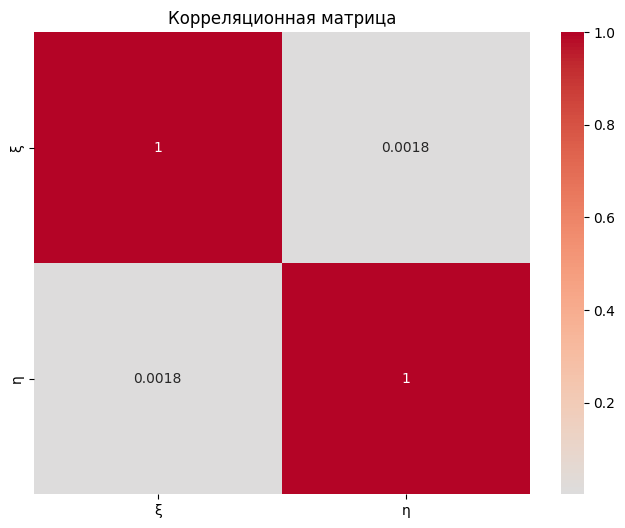

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()